In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

# Data Description

In [6]:
df = pd.read_csv('SG-airbnb.csv')
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50646,https://www.airbnb.com/rooms/50646,20210929043603,2021-09-29,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/8fd2c...,https://a0.muscache.com/im/pictures/user/8fd2c...,Bukit Timah,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Singapore, Singapore",Bukit Timah,Central Region,1.334320,103.785210,Private room in rental unit,Private room,2,NaN,1 bath,1.0,1.0,"[""Pool"", ""Essentials"", ""Cable TV"", ""Wifi"", ""Lo...",$80.00,90,730,90.0,90.0,730.0,730.0,90.0,730.0,NaN,t,29,59,89,364,2021-09-29,18,0,0,2014-10-14,2014-07-08,4.56,4.72,4.78,4.78,4.94,4.72,4.50,NaN,f,1,0,1,0,0.21
1,71609,https://www.airbnb.com/rooms/71609,20210929043603,2021-09-29,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/367042/profil...,https://a0.muscache.com/im/users/367042/profil...,Tampines,8.0,8.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,NaN,Tampines,East Region,1.345370,103.958870,Private room in villa,Private room,6,NaN,1 private bath,2.0,3.0,"[""Essentials"", ""Hair dryer"", ""Iron"", ""Hot tub""...",$178.00,90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,NaN,t,30,60,90,365,2021-09-29,20,0,0,2015-10-05,2019-12-28,4.44,4.37,4.00,4.63,4.78,4.26,4.32,NaN,f,4,0,4,0,0.27
2,71896,https://www.airbnb.com/rooms/71896,20210929043603,2021-09-29,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/367042/profil...,https://a0.muscache.com/im/users/367042/profil...,Tampines,8.0,8.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,NaN,Tampines,East Region,1.347540,103.959580,Private room in residential home,Private room,3,NaN,Shared half-bath,1.0,1.0,"[""Essentials"", ""Hair dryer"", ""Coffee maker"", ""...",$81.00,90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,NaN,t,30,60,90,365,2021-09-29,24,0,0,2015-08-14,2014-12-10,4.16,4.22,4.09,4.43,4.43,4.17,4.04,NaN,f,4,0,4,0,0.32
3,71903,https://www.airbnb

- id : Unique ID
- listing_url : url listing Airbnb tersebut di sewakan
- scrape_id : Angka unique berdasarkan tanggal scraping data
- last_scraped : Tanggal scraping data
- name : Nama listing Airbnb
- description : Deskripsi listing secara umum
- neighborhood_overview : Gambaran seputar lokasi listing tersebut berada
- picture_url : url yang berisi gambar-gambar listing tersebut
- host_id : Id unique pemiliki listing
- host_url : url yang berisi informasi lengkap pemiliki listing
- host_name : Nama host atau pemiliki listing
- host_since : Tanggal join host/pemilik listing
- host_location : Lokasi host tersebut
- host_about : Informasi host/pemiliki listing
- host_response_time : Rata-rata waktu host melakukan respone
- host_response_rate : Rating host dalam melakukan respone
- host_acceptance_rate : Rating penerimaan listing dapat disewakan
- host_is_superhost : Jika "True" adalah superhost (host yang memiliki label baik berdasarkan pengalaman pelanggan) superhost di evaluasi atau dilakukan penilaian ulang dalam 4 tahu sekali
- host_thumbnail_url : url tuhumbnail dari host tersebut 
- host_picture_url : url gambar host tersebut
- host_neighbourhood : 
- host_listings_count : Jumlah listing yang dimiliki host tersebut
- host_total_listings_count : Jumlah listing yang dimiliki host tersebut
- host_verifications : Platform atau media yang digunakan oleh si host dalam melakukan verifikasi
- host_has_profile_pic : Apakah host menggunakan profile picture
- host_identity_verified : Verifikasi identitas host
- neighbourhood : Lokasi listing tersebut berada
- neighbourhood_cleansed : Lokasi listing tersebut berada
- neighbourhood_group_cleansed : Region lokasi listing tersebut berada
- latitude : Latitude
- longitude : Longitude
- property_type : Tipe properti listing
- room_type : Tipe ruangan listing
- accommodates : Jumlah orang/penginap yang listing rekomendasikan
- bathrooms : Jumlah bathrooms
- bathrooms_text : Jumlah bathrooms + deskripsi bathrooms
- bedrooms : Jumalah bedrooms
- beds : Jumlah tempat tidur/kasur
- amenities : Perlengkapan yang di tawarkan kepada pengunjung
- price : Harga listing
- minimum_nights : Minimal hari menginap
- maximum_nights : Maksimal hari menginap
- availability_30 : Ketersediaan hari dalam sebulan
- availability_365 : Ketersediaan hari dalam setahun
- number_of_reviews : Jumlah review yang di dapatkan
- first_review : Tanggal review pertama yang didapat 
- last_review : Tanggal review terakhir yang didapat
- review_scores_rating : Score review yang didapat
- review_scores_accuracy :
- license : Lisensi yang dimiliki oleh host pemilik listing
- instant_bookable : True jika dapat melakukan booking secara instant exp: "mendadak"
- reviews_per_month : Jumlah review perbulan 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4221 entries, 0 to 4220
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4221 non-null   int64  
 1   listing_url                                   4221 non-null   object 
 2   scrape_id                                     4221 non-null   int64  
 3   last_scraped                                  4221 non-null   object 
 4   name                                          4221 non-null   object 
 5   description                                   4084 non-null   object 
 6   neighborhood_overview                         2766 non-null   object 
 7   picture_url                                   4221 non-null   object 
 8   host_id                                       4221 non-null   int64  
 9   host_url                                      4221 non-null   o

In [4]:
df_describe =[]

for i in df.columns: 
    df_describe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])
    
desc = pd.DataFrame(df_describe, columns=['column', 'Data Type', 'Nan', 'Nan(%)', 'Nunique', 'Sample'])
desc

,column,Data Type,Nan,Nan(%),Nunique,Sample
0,id,int64,0,0.00,4221,"[50646, 71609, 71896, 71903, 275343, 275344, 2..."
1,listing_url,object,0,0.00,4221,"[https://www.airbnb.com/rooms/50646, https://w..."
2,scrape_id,int64,0,0.00,1,[20210929043603]
3,last_scraped,object,0,0.00,1,[2021-09-29]
4,name,object,0,0.00,3905,"[Pleasant Room along Bukit Timah, Ensuite Room..."
5,description,object,137,3.25,3154,[Fully furnished bedroom with a nice view on t...
6,neighborhood_overview,object,1455,34.47,1303,[The serenity & quiet surrounding makes it an ...
7,picture_url,object,0,0.00,3885,[https://a0.muscache.com/pictures/36342984/670...
8,host_id,int64,0,0.00,1128,"[227796, 367042, 1439258, 1490000, 1521514, 15..."
9,host_url,object,0,0.00,1128,"[https://www.airbnb.com/users/show/227796, htt..."


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4221.0,3.058462e+07,1.422863e+07,5.064600e+04,1.953525e+07,3.282593e+07,4.282991e+07,5.250524e+07
scrape_id,4221.0,2.021093e+13,1.414230e+00,2.021093e+13,2.021093e+13,2.021093e+13,2.021093e+13,2.021093e+13
host_id,4221.0,1.199927e+08,1.117806e+08,2.366600e+04,2.449636e+07,8.773175e+07,1.785841e+08,4.232324e+08
host_listings_count,4213.0,6.101970e+01,1.076657e+02,0.000000e+00,2.000000e+00,1.100000e+01,6.800000e+01,4.580000e+02
host_total_listings_count,4213.0,6.101970e+01,1.076657e+02,0.000000e+00,2.000000e+00,1.100000e+01,6.800000e+01,4.580000e+02
latitude,4221.0,1.311694e+00,3.198236e-02,1.245350e+00,1.290230e+00,1.308210e+00,1.318010e+00,1.453910e+00
longitude,4221.0,1.038456e+02,4.282946e-02,1.036483e+02,1.038343e+02,1.038475e+02,1.038619e+02,1.039697e+02
accommodates,4221.0,2.825160e+00,2.223046e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,3770.0,1.314854e+00,6.773578e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


- Ada lumayan banyak data yang memiliki missing values, saya akan mencoba beberapa metode untuk menghandle missing value ini, mungkin akan menggunakan median atau modus dari kolom tersebut atau melakukan drop jika missing valuenya terlalu banyak


- Isi dari setiap data belum seragam atau masih menggunakan tipe data yang tidak tepat, seperti kolom price masih bertipe "object", kolom rate masih ada yang bertipe "object" dsb. Saya akan mencoba menseragamkan masing-masing kolom tersebut agar mudah dalam melakukan analisa ataupun pemodelan kedepannya.

# Duplicated Data

In [6]:
#Duplicated data?
df.duplicated().sum()

0

# Missing Values

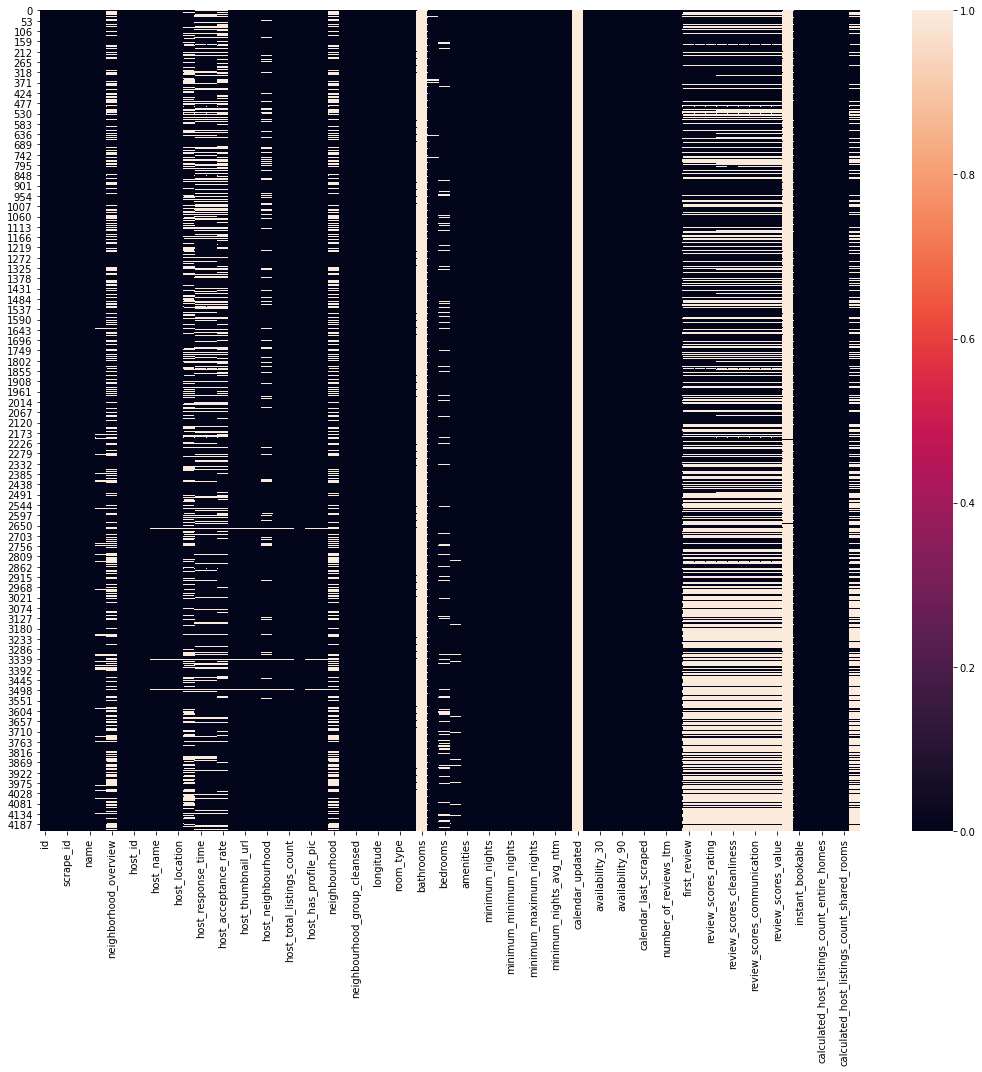

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isna())
plt.tight_layout()
plt.show()

In [8]:
# Merubah kolom yang valuenya t,f menjadi 1,0. 1 = True, 0 = False
def boolean_func(x):
    if x == 't':
         return 1
    elif x == 'f':
        return 0
    else:
        return x

df['host_is_superhost'] = df['host_is_superhost'].apply(boolean_func)
df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(boolean_func)
df['host_identity_verified'] = df['host_identity_verified'].apply(boolean_func)
df['has_availability'] = df['has_availability'].apply(boolean_func)
df['instant_bookable'] = df['instant_bookable'].apply(boolean_func)

In [9]:
#host_respone_rate, host_acceptance_rate
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

In [10]:
#Persentase missing values
df[['bathrooms','license','calendar_updated']].isna().sum()/len(df)*100

bathrooms           100.00000
license              99.78678
calendar_updated    100.00000
dtype: float64

In [11]:
#bathrooms, license, calendar_updated
df.drop(['bathrooms','license','calendar_updated'], axis=1, inplace=True)

Kolom bathrooms, license, calendar_updated. Dilakukan drop karena kolom tersebut tidak memiliki data sama sekali atau NaN = 100%

### hsot_respone_time

In [12]:
df[['host_response_time']].describe()

,host_response_time
count,3456
unique,4
top,within an hour
freq,1446


In [13]:
df['host_response_time'] = df['host_response_time'].fillna('within an hour')
df['host_response_time'].isna().sum()

0

### host_neighbourhood

In [14]:
df[['host_neighbourhood']].describe()

,host_neighbourhood
count,3859
unique,57
top,Kallang
freq,549


In [15]:
df['host_neighbourhood'] = df['host_neighbourhood'].fillna('Kallang')
df['host_neighbourhood'].isna().sum()

0

### neighbourhood_cleansed

In [16]:
df[['neighbourhood','neighbourhood_cleansed']]

,neighbourhood,neighbourhood_cleansed
0,"Singapore, Singapore",Bukit Timah
1,NaN,Tampines
2,NaN,Tampines
3,"Singapore, Singapore",Tampines
4,NaN,Bukit Merah
...,...,...
4216,NaN,Singapore River
4217,NaN,Bukit Merah
4218,NaN,Marine Parade
4219,Singapore,Central Water Catchment


In [17]:
#drop kolom neighborhood
df.drop(['neighbourhood'], axis=1, inplace=True)

Isi dari kolom neighbourhood telah terwakilkan oleh kolom neighbourhood_cleansed yang lebih spesifik

### Host Columns

In [18]:
df[['host_response_rate','host_acceptance_rate']].describe().T

,count,mean,std,min,25%,50%,75%,max
host_response_rate,3456.0,82.664352,31.437847,0.0,82.0,100.0,100.0,100.0
host_acceptance_rate,3169.0,71.579047,32.802037,0.0,50.0,88.0,98.0,100.0


In [19]:
# impute missing values dengan mediannya
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean())

In [20]:
df[df['host_is_superhost'].isna()][['host_id','listing_url','host_is_superhost','host_has_profile_pic','host_identity_verified']]

,host_id,listing_url,host_is_superhost,host_has_profile_pic,host_identity_verified
2057,225666624,https://www.airbnb.com/rooms/32317824,NaN,NaN,NaN
2058,225666624,https://www.airbnb.com/rooms/32318162,NaN,NaN,NaN
2059,225666624,https://www.airbnb.com/rooms/32318920,NaN,NaN,NaN
2131,239242652,https://www.airbnb.com/rooms/33050985,NaN,NaN,NaN
2582,239242652,https://www.airbnb.com/rooms/38498535,NaN,NaN,NaN
2668,225666624,https://www.airbnb.com/rooms/39344757,NaN,NaN,NaN
3342,225666624,https://www.airbnb.com/rooms/43529914,NaN,NaN,NaN
3496,225666624,https://www.airbnb.com/rooms/45455628,NaN,NaN,NaN


In [21]:
df['host_is_superhost'] = df['host_is_superhost'].fillna(0)
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(1)
df['host_identity_verified'] = df['host_identity_verified'].fillna(1)

- host_is_superhost
- host_has_profile_pic
- host_identify_verified 

Missing values dari tiga kolom diatas hanya memiliki 8 baris mising values. Jadi saya coba untuk direct cek langsung ke listing_url-nya supaya mendapatkan datanya secara langsung dan akurat

Dan ternyata dari 8 baris kosong tersebut adalah 2 host atau 2 pemilik listing yang sama

<img src="225666624.jpg">
<img src="239242652.jpg">

In [22]:
df[['host_listings_count','host_total_listings_count']].head(10)

,host_listings_count,host_total_listings_count
0,1.0,1.0
1,8.0,8.0
2,8.0,8.0
3,8.0,8.0
4,50.0,50.0
5,50.0,50.0
6,0.0,0.0
7,6.0,6.0
8,1.0,1.0
9,50.0,50.0


In [23]:
df[['host_listings_count','host_total_listings_count']].tail(10)

,host_listings_count,host_total_listings_count
4211,225.0,225.0
4212,458.0,458.0
4213,458.0,458.0
4214,0.0,0.0
4215,1.0,1.0
4216,0.0,0.0
4217,2.0,2.0
4218,8.0,8.0
4219,2.0,2.0
4220,225.0,225.0


Kolom "host_listings_count" dan "host_total_listings_count" memilki isi data yang sama. Jadi kita akan drop kolom kolom "host_listings_count" karena kolom tersebut telah terwakili oleh kolom "host_total_listings_count"

In [24]:
# Drop kolom host_listing_counts
df.drop(['host_listings_count'], axis=1, inplace=True)

In [25]:
#Persentase missing values
df[['host_name','host_since','host_thumbnail_url','host_picture_url']].isna().sum()/len(df)*100

host_name             0.189529
host_since            0.189529
host_thumbnail_url    0.189529
host_picture_url      0.189529
dtype: float64

Kolom host_name, host_since, host_thumbnail_url dan host_picture_url cukup sulit untuk kita isi langsung missing values tersebut. Dan karena jumlah missing valuesnya pun terhitung sangat kecil hanya 0.18% jadi kita drop saja.

In [26]:
#Drop rows missing value host_name, host_since, host_thumbnail_url, host_picture_url
df.dropna(subset=['host_name', 'host_since','host_thumbnail_url', 'host_picture_url'], inplace=True)

### Bathrooms

In [27]:
df['bathrooms_text'].value_counts()

1 bath               1240
1 private bath        837
2 baths               542
1 shared bath         503
3 shared baths        225
1.5 baths             198
2 shared baths        159
1.5 shared baths       84
3 baths                83
4 shared baths         44
2.5 baths              41
0 shared baths         26
Shared half-bath       26
0 baths                21
4 baths                20
2.5 shared baths       17
6 baths                12
7 shared baths         11
8 baths                10
Private half-bath       8
5 shared baths          8
5 baths                 8
6 shared baths          8
Half-bath               7
8.5 shared baths        6
3.5 baths               5
8 shared baths          4
10 baths                3
3.5 shared baths        3
21 shared baths         2
12 shared baths         2
13 baths                2
5.5 shared baths        2
16 baths                2
10 shared baths         2
16 shared baths         2
4.5 baths               2
12 baths                2
9 shared bat

In [28]:
#Impute missing value bathrooms_text dengan most frequent (modus)
df['bathrooms_text'] = df['bathrooms_text'].fillna('1 bath')

### Bedrooms & beds

In [29]:
df[['bedrooms','beds']].describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,3764.0,1.313762,0.676559,1.0,1.0,1.0,1.0,8.0
beds,4135.0,1.810641,2.502864,0.0,1.0,1.0,2.0,58.0


In [30]:
#impute missing value bedrooms dan beds dengan mediannya
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())

# Drop Columns

In [31]:
df[['minimum_nights' ,'maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']]

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,90,730,90.0,90.0,730.0,730.0,90.0,730.0
1,90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0
2,90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0
3,90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0
4,14,999,14.0,14.0,999.0,999.0,14.0,999.0
...,...,...,...,...,...,...,...,...
4216,90,365,90.0,90.0,365.0,365.0,90.0,365.0
4217,90,100,90.0,90.0,100.0,100.0,90.0,100.0
4218,14,1125,14.0,14.0,1125.0,1125.0,14.0,1125.0
4219,1,1125,1.0,16.0,1125.0,1125.0,8.4,1125.0


- minimum_nights : minimal lama menginap
- maximum_nights : maksimal lama menginap


kolom-kolom lain seperti "minimum_minimum_nights", "maximum_minimum_nights" dan kolom lain yang serupa ternyata memiliki isi data yang sama seperti kolom minimum_nights dan maximum_nights. Jadi kita akan drop kolom-kolom tersebut karena sudah terwakili oleh dua kolom tadi.

In [32]:
df.drop(['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
         'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
         'scrape_id','calendar_last_scraped'], axis=1, inplace=True)

In [33]:
df_describe =[]

for i in df.columns: 
    df_describe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])
    
desc = pd.DataFrame(df_describe, columns=['column', 'Data Type', 'Nan', 'Nan(%)', 'Nunique', 'Sample'])
desc

,column,Data Type,Nan,Nan(%),Nunique,Sample
0,id,int64,0,0.00,4213,"[50646, 71609, 71896, 71903, 275343, 275344, 2..."
1,listing_url,object,0,0.00,4213,"[https://www.airbnb.com/rooms/50646, https://w..."
2,last_scraped,object,0,0.00,1,[2021-09-29]
3,name,object,0,0.00,3897,"[Pleasant Room along Bukit Timah, Ensuite Room..."
4,description,object,137,3.25,3147,[Fully furnished bedroom with a nice view on t...
5,neighborhood_overview,object,1451,34.44,1301,[The serenity & quiet surrounding makes it an ...
6,picture_url,object,0,0.00,3877,[https://a0.muscache.com/pictures/36342984/670...
7,host_id,int64,0,0.00,1126,"[227796, 367042, 1439258, 1490000, 1521514, 15..."
8,host_url,object,0,0.00,1126,"[https://www.airbnb.com/users/show/227796, htt..."
9,host_name,object,0,0.00,865,"[Sujatha, Belinda, Joyce, B., Elizabeth, Rahul..."


- Mising values pada beberapa kolom review_score memiliki persentase yang cukup banyak hingga di angka >40%
- Namun kita tidak akan membuang beberapa kolom review_score tersebut, karena beberapa kolom review_score akan di perlukan dalam tahapan proses kedepannya
- Nilai review_score yang kosong adalah listing yang belum mendapatkan rating dari guest/tamu yang menginap

- Begitu juga kolom-kolom yang isi datanya berupa teks seperti description, neighbourhood_overview, dll, akan kita biarkan terlebih dahulu untuk di proses lebih lanjut dalam proses data preprocessing ataupun di data analysis

# Fix Each Columns

### Price

In [34]:
#Price
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '').astype(float)
df['price'] = df[df['price']!=0]['price']

In [35]:
df['price'] = df[df['price']!=0]['price']

In [36]:
df['price'].describe()

count     4212.000000
mean       170.139601
std        345.558595
min         13.000000
25%         64.000000
50%        110.000000
75%        180.000000
max      10286.000000
Name: price, dtype: float64

### bathrooms_text

Kita akan rubah isi dari kolom bathrooms_text menjadi angkanya saja. Jika ada data yang tidak mengandung angka seperti hanya "private bath" atau "half bath" akan kita rubah mendjadi 1. Lalu kita ubah nama kolomnya menjadi bathrooms

In [37]:
df['bathrooms_text'].value_counts()

1 bath               1269
1 private bath        837
2 baths               542
1 shared bath         503
3 shared baths        225
1.5 baths             198
2 shared baths        159
1.5 shared baths       84
3 baths                83
4 shared baths         44
2.5 baths              41
0 shared baths         26
Shared half-bath       26
0 baths                21
4 baths                20
2.5 shared baths       17
6 baths                12
7 shared baths         11
8 baths                10
Private half-bath       8
5 shared baths          8
5 baths                 8
6 shared baths          8
Half-bath               7
8.5 shared baths        6
3.5 baths               5
8 shared baths          4
10 baths                3
3.5 shared baths        3
21 shared baths         2
12 shared baths         2
13 baths                2
5.5 shared baths        2
16 baths                2
10 shared baths         2
16 shared baths         2
4.5 baths               2
12 baths                2
9 shared bat

In [38]:
# Shared half-bath, Private half-bath, Half-bath
df['bathrooms_text'] = np.where((df['bathrooms_text'] == 'Private half-bath')| 
                                (df['bathrooms_text'] =='Half-bath'), 1, df['bathrooms_text'])


df['bathrooms_text'] = np.where(df['bathrooms_text'] == 'Shared half-bath', '1 Shared', df['bathrooms_text'])

In [39]:
df['bathrooms'] = df['bathrooms_text'].apply(lambda x: str(x).split()[0]).astype(float)

In [40]:
df['bathrooms_text'].value_counts()

1 bath               1269
1 private bath        837
2 baths               542
1 shared bath         503
3 shared baths        225
1.5 baths             198
2 shared baths        159
1.5 shared baths       84
3 baths                83
4 shared baths         44
2.5 baths              41
0 shared baths         26
1 Shared               26
0 baths                21
4 baths                20
2.5 shared baths       17
1                      15
6 baths                12
7 shared baths         11
8 baths                10
5 shared baths          8
6 shared baths          8
5 baths                 8
8.5 shared baths        6
3.5 baths               5
8 shared baths          4
3.5 shared baths        3
10 baths                3
16 shared baths         2
12 shared baths         2
13 baths                2
16 baths                2
21 shared baths         2
12 baths                2
10 shared baths         2
5.5 shared baths        2
4.5 baths               2
8.5 baths               1
5.5 baths   

Kita rubah isi data kolom bathrooms_text menjadi 1,0. 1 = Jika listing tersebut memiliki bathrooms yang bertipe shared, 0 = Jika tipe bathroom listing tersebut adalah private. Lalu kita rubah nama kolomnya menjadi "shared_bathrooms"

In [41]:
df['bathrooms_text'] = df['bathrooms_text'].apply(lambda x: 1 if str(x).find('shared')!= -1 else 0 )

In [42]:
df = df.rename(columns={'bathrooms_text':'shared_bathrooms'})
df['shared_bathrooms'].value_counts()

0    3100
1    1113
Name: shared_bathrooms, dtype: int64

### Date 

In [43]:
# merubah tipe data kolom host_since, first_review, last_review menjadi format date
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_scraped'] = pd.to_datetime(df['last_scraped'])

In [44]:
# Merubah kolom host_is_superhost, host_has_profile_pirc, host_identify_verified menajdi int
df['host_is_superhost'] = df['host_is_superhost'].astype('int64')
df['host_has_profile_pic'] = df['host_has_profile_pic'].astype('int64')
df['host_identity_verified'] = df['host_identity_verified'].astype('int64')

In [45]:
df_describe =[]

for i in df.columns: 
    df_describe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])
    
desc = pd.DataFrame(df_describe, columns=['column', 'Data Type', 'Nan', 'Nan(%)', 'Nunique', 'Sample'])
desc

,column,Data Type,Nan,Nan(%),Nunique,Sample
0,id,int64,0,0.00,4213,"[50646, 71609, 71896, 71903, 275343, 275344, 2..."
1,listing_url,object,0,0.00,4213,"[https://www.airbnb.com/rooms/50646, https://w..."
2,last_scraped,datetime64[ns],0,0.00,1,[2021-09-29T00:00:00.000000000]
3,name,object,0,0.00,3897,"[Pleasant Room along Bukit Timah, Ensuite Room..."
4,description,object,137,3.25,3147,[Fully furnished bedroom with a nice view on t...
5,neighborhood_overview,object,1451,34.44,1301,[The serenity & quiet surrounding makes it an ...
6,picture_url,object,0,0.00,3877,[https://a0.muscache.com/pictures/36342984/670...
7,host_id,int64,0,0.00,1126,"[227796, 367042, 1439258, 1490000, 1521514, 15..."
8,host_url,object,0,0.00,1126,"[https://www.airbnb.com/users/show/227796, htt..."
9,host_name,object,0,0.00,865,"[Sujatha, Belinda, Joyce, B., Elizabeth, Rahul..."


In [46]:
df.to_csv('SG-airbnb_Cleaned.csv', index=False)